In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
from IPython.display import Image

import warnings ; warnings.filterwarnings('ignore')

# Series and DataFrame

In [3]:
# series : 1차원 벡터- 2개의 리스트, 
# dataframe: 2차원 행렬 

a = [2,4,6,8] # value list 
index = ['a','b','c','d'] # index list

s = pd.Series(a, index=index)
s

a    2
b    4
c    6
d    8
dtype: int64

In [4]:
numbers = [[1,2,3], [4,5,6],[7,8,9]] # 3개의 벡터, 9개의 원소
numbers = pd.DataFrame(numbers)
numbers

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [5]:
order = [["2021-08-01", 500, "confirmed"], ["2021-08-05", 700, "confirmed"], ["2021-08-10", 500, "canceled"]]
columns = ["date", "price", "state"]
order = pd.DataFrame(order, columns=columns)

In [6]:
order

,date,price,state
0,2021-08-01,500,confirmed
1,2021-08-05,700,confirmed
2,2021-08-10,500,canceled


In [7]:
len(order)

3

In [8]:
# Prepare lists
# create a group data by using functions provided by Python 
date = ["2021-08-01", "2021-08-05", "2021-08-10"] 
price = [500, 700, np.nan] # numpy.NotANumber
state = ["confirmed", "confirmed", "canceled"]
a = ["hello","good bye", "hello good"]
print(len(date)) 
print(len(price))
print(len(state))
print(len(a))



# Create a dataframe, putting data vertically(columns)
order = {"date" : date , 
         "price" : price, 
         "state" : state,
         "a" : a # Add one more column
        }
order = pd.DataFrame(order)
order

3
3
3
3


,date,price,state,a
0,2021-08-01,500.0,confirmed,hello
1,2021-08-05,700.0,confirmed,good bye
2,2021-08-10,NaN,canceled,hello good


In [9]:
np.nan # meaning empty data: not a number

nan

# Data Searching Using Pandas

In [10]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips['sex'] # print one series(column), faster than DataFrame since it is simpler.

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [12]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [13]:
tips.tail(3) # tail is less often used than head()

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [15]:
# in real data -> there are a lot of missing data: and it is your job to 
# fill the data
tips.isnull().sum() 

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [16]:
tips.notnull().sum()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [17]:
tips.isna().sum() # same with the tips.isnull()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

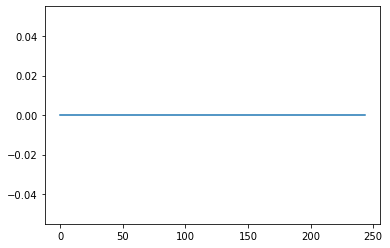

In [18]:
tips.T.isna().sum().plot() # visualize the data to find missing data and fill them in
# Use inverse matrix to form the data as you want 

In [19]:
tips.describe() # 25%, 50%, 75% : box plot

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [20]:
# " ", ' ': usually they are used for the same functionality 
a = tips[tips['total_bill']>50]
a

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [21]:
tips[tips['sex']=='Male'] # logical search

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [22]:
tips[tips['sex'].isin(['Male'])] # find Male in sex column

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [23]:
tips[tips['sex'].str.contains('ale')]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
tips.columns[-3:]

Index(['day', 'time', 'size'], dtype='object')

In [25]:
print(len(tips.columns))
print(tips.columns)

# reorder and then remake columns as you want - real data are oftentimes too big
# so it has to be recreated
column = tips.columns[[-1,0,1,2]] 
tips_small = tips[column]
tips_small

7
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


,size,total_bill,tip,sex
0,2,16.99,1.01,Female
1,3,10.34,1.66,Male
2,3,21.01,3.50,Male
3,2,23.68,3.31,Male
4,4,24.59,3.61,Female
...,...,...,...,...
239,3,29.03,5.92,Male
240,2,27.18,2.00,Female
241,2,22.67,2.00,Male
242,2,17.82,1.75,Male


In [26]:
tips1 = tips[['total_bill', 'tip', 'time']].copy()
tips1

,total_bill,tip,time
0,16.99,1.01,Dinner
1,10.34,1.66,Dinner
2,21.01,3.50,Dinner
3,23.68,3.31,Dinner
4,24.59,3.61,Dinner
...,...,...,...
239,29.03,5.92,Dinner
240,27.18,2.00,Dinner
241,22.67,2.00,Dinner
242,17.82,1.75,Dinner


In [27]:
tips['tip'].unique().max() # unique() finds the unique value from dataframe

10.0

In [28]:
tips['total_bill'].describe() # unique, describe functions are very often used

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

## Data preprocessing with Pandas

In [29]:
tips1

,total_bill,tip,time
0,16.99,1.01,Dinner
1,10.34,1.66,Dinner
2,21.01,3.50,Dinner
3,23.68,3.31,Dinner
4,24.59,3.61,Dinner
...,...,...,...
239,29.03,5.92,Dinner
240,27.18,2.00,Dinner
241,22.67,2.00,Dinner
242,17.82,1.75,Dinner


In [30]:
tips1.loc[0, 'time'] = 'Dinner' # loc: row condition, column condition  these are usually come
# with logical search 
tips1

,total_bill,tip,time
0,16.99,1.01,Dinner
1,10.34,1.66,Dinner
2,21.01,3.50,Dinner
3,23.68,3.31,Dinner
4,24.59,3.61,Dinner
...,...,...,...
239,29.03,5.92,Dinner
240,27.18,2.00,Dinner
241,22.67,2.00,Dinner
242,17.82,1.75,Dinner


In [31]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [32]:
tips.loc[tips['tip']>5, 'level'] = 'good' # new column is created if you put new column name
# that is different from existing dataframe

tips.loc[tips['tip']<=5, 'level'] = 'bad'


In [33]:
len(tips[tips['level']=='bad'])

226

In [34]:
len(tips.loc[tips['level']=='good']) # loc: label location

18

In [35]:
rows = tips.shape[0]
for i in range(rows) :
    tips.loc[i, 'index_id'] = str(2 * i)
tips

,total_bill,tip,sex,smoker,day,time,size,level,index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484


In [36]:
tips_m = tips.set_index('index_id') # DataFrame.set_index(): change index 

In [37]:
tips_m

,total_bill,tip,sex,smoker,day,time,size,level
index_id,,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2,bad
2,10.34,1.66,Male,No,Sun,Dinner,3,bad
4,21.01,3.50,Male,No,Sun,Dinner,3,bad
6,23.68,3.31,Male,No,Sun,Dinner,2,bad
8,24.59,3.61,Female,No,Sun,Dinner,4,bad
...,...,...,...,...,...,...,...,...
478,29.03,5.92,Male,No,Sat,Dinner,3,good
480,27.18,2.00,Female,Yes,Sat,Dinner,2,bad
482,22.67,2.00,Male,Yes,Sat,Dinner,2,bad


In [38]:
# difference between loc and iloc
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,level,index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8


In [39]:
tips.iloc[:] 

,total_bill,tip,sex,smoker,day,time,size,level,index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484


In [40]:
tips.loc[:]

,total_bill,tip,sex,smoker,day,time,size,level,index_id
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484


In [41]:
tips_m.iloc[1:102] # excludes last element

,total_bill,tip,sex,smoker,day,time,size,level
index_id,,,,,,,,
2,10.34,1.66,Male,No,Sun,Dinner,3,bad
4,21.01,3.50,Male,No,Sun,Dinner,3,bad
6,23.68,3.31,Male,No,Sun,Dinner,2,bad
8,24.59,3.61,Female,No,Sun,Dinner,4,bad
10,25.29,4.71,Male,No,Sun,Dinner,4,bad
...,...,...,...,...,...,...,...,...
194,12.03,1.50,Male,Yes,Fri,Dinner,2,bad
196,21.01,3.00,Male,Yes,Fri,Dinner,2,bad
198,12.46,1.50,Male,No,Fri,Dinner,2,bad


In [42]:
tips_m.loc["2":"200"] # influced by index, contains last element

,total_bill,tip,sex,smoker,day,time,size,level
index_id,,,,,,,,
2,10.34,1.66,Male,No,Sun,Dinner,3,bad
4,21.01,3.50,Male,No,Sun,Dinner,3,bad
6,23.68,3.31,Male,No,Sun,Dinner,2,bad
8,24.59,3.61,Female,No,Sun,Dinner,4,bad
10,25.29,4.71,Male,No,Sun,Dinner,4,bad
...,...,...,...,...,...,...,...,...
192,27.28,4.00,Male,Yes,Fri,Dinner,2,bad
194,12.03,1.50,Male,Yes,Fri,Dinner,2,bad
196,21.01,3.00,Male,Yes,Fri,Dinner,2,bad


In [43]:
tips['ratio'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808


In [44]:
# Create a function to generalize what you want to do
def bill(x):
    total_bill = x['total_bill']
    tip = x['tip']
    bill = total_bill - tip # series - series operation is possible in Python
    return bill

# lists -> series -> dataframe (extended)

tips['bill'] = tips.apply(bill, axis='columns')
tips

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07


In [45]:
tips

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07


In [46]:
# Convert all the other data into 0 or 1 to enter data into computer
# one-hot encoding
# tips['good'] = 0
# tips['bad'] = 0

tips.loc[tips['level']=='good', 'good']=1 
tips.loc[tips['level']=='bad', 'bad']=1
tips

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98,NaN,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,NaN,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,NaN,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,NaN,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11,1.0,NaN
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18,NaN,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67,NaN,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,NaN,1.0


In [47]:
tips['good'] = tips['good'].fillna(0)
tips
tips.isnull().sum()

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
level          0
index_id       0
ratio          0
bill           0
good           0
bad           18
dtype: int64

In [48]:
tips['bad'].isnull().sum()

18

<AxesSubplot:>

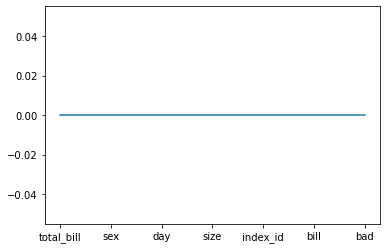

In [49]:
tips['bad'] = tips['bad'].fillna(0) # use fillna when given data is not filled fully
tips.isnull().sum().plot()

In [50]:
tips

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98,0.0,1.0
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,0.0,1.0
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,0.0,1.0
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,0.0,1.0
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18,0.0,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67,0.0,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,0.0,1.0


In [51]:
# Use 'and', 'or': inside of if statement
# Use &, | in Pandas
# Visualizing data is needed for report
tips.loc[(tips['total_bill']>24) & (tips['tip']>3.5), 'customer'] = 'vip'
tips.loc[(tips['total_bill']<=24) | (tips['tip']<=3.5), 'customer'] = 'non-vip'

In [52]:
tips

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98,0.0,1.0,non-vip
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,0.0,1.0,non-vip
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,0.0,1.0,non-vip
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,0.0,1.0,non-vip
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,0.0,1.0,vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11,1.0,0.0,vip
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18,0.0,1.0,non-vip
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67,0.0,1.0,non-vip
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,0.0,1.0,non-vip


In [53]:
tips['total_bill(pre)'] = tips['total_bill'].shift(+1)
tips['total_bill(next)'] = tips['total_bill'].shift(-1)
tips[['total_bill(pre)', 'total_bill', 'total_bill(next)']]

,total_bill(pre),total_bill,total_bill(next)
0,NaN,16.99,10.34
1,16.99,10.34,21.01
2,10.34,21.01,23.68
3,21.01,23.68,24.59
4,23.68,24.59,25.29
...,...,...,...
239,35.83,29.03,27.18
240,29.03,27.18,22.67
241,27.18,22.67,17.82
242,22.67,17.82,18.78


In [54]:
tips

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11,1.0,0.0,vip,35.83,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18,0.0,1.0,non-vip,29.03,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67,0.0,1.0,non-vip,27.18,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,0.0,1.0,non-vip,22.67,18.78


In [55]:
tips_simple= tips.drop(["index_id", "total_bill(pre)", "total_bill(next)"], axis='columns')
tips_simple

,total_bill,tip,sex,smoker,day,time,size,level,ratio,bill,good,bad,customer
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0.059447,15.98,0.0,1.0,non-vip
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,0.160542,8.68,0.0,1.0,non-vip
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,0.166587,17.51,0.0,1.0,non-vip
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,0.139780,20.37,0.0,1.0,non-vip
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,0.146808,20.98,0.0,1.0,vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,0.203927,23.11,1.0,0.0,vip
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,0.073584,25.18,0.0,1.0,non-vip
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,0.088222,20.67,0.0,1.0,non-vip
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,0.098204,16.07,0.0,1.0,non-vip


In [56]:
tips # keep original data intact

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11,1.0,0.0,vip,35.83,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18,0.0,1.0,non-vip,29.03,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67,0.0,1.0,non-vip,27.18,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,0.0,1.0,non-vip,22.67,18.78


## Sorting data

In [57]:
tips.sort_index(ascending=False) # sort rows

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
243,18.78,3.00,Female,No,Thur,Dinner,2,bad,486,0.159744,15.78,0.0,1.0,non-vip,17.82,NaN
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,0.0,1.0,non-vip,22.67,18.78
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67,0.0,1.0,non-vip,27.18,17.82
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18,0.0,1.0,non-vip,29.03,22.67
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11,1.0,0.0,vip,35.83,27.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,0.0,1.0,vip,23.68,25.29
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,0.0,1.0,non-vip,21.01,24.59
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,0.0,1.0,non-vip,10.34,23.68
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,0.0,1.0,non-vip,16.99,21.01


In [58]:
tips.sort_index(axis=1)

,bad,bill,customer,day,good,index_id,level,ratio,sex,size,smoker,time,tip,total_bill,total_bill(next),total_bill(pre)
0,1.0,15.98,non-vip,Sun,0.0,0,bad,0.059447,Female,2,No,Dinner,1.01,16.99,10.34,NaN
1,1.0,8.68,non-vip,Sun,0.0,2,bad,0.160542,Male,3,No,Dinner,1.66,10.34,21.01,16.99
2,1.0,17.51,non-vip,Sun,0.0,4,bad,0.166587,Male,3,No,Dinner,3.50,21.01,23.68,10.34
3,1.0,20.37,non-vip,Sun,0.0,6,bad,0.139780,Male,2,No,Dinner,3.31,23.68,24.59,21.01
4,1.0,20.98,vip,Sun,0.0,8,bad,0.146808,Female,4,No,Dinner,3.61,24.59,25.29,23.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,23.11,vip,Sat,1.0,478,good,0.203927,Male,3,No,Dinner,5.92,29.03,27.18,35.83
240,1.0,25.18,non-vip,Sat,0.0,480,bad,0.073584,Female,2,Yes,Dinner,2.00,27.18,22.67,29.03
241,1.0,20.67,non-vip,Sat,0.0,482,bad,0.088222,Male,2,Yes,Dinner,2.00,22.67,17.82,27.18
242,1.0,16.07,non-vip,Sat,0.0,484,bad,0.098204,Male,2,No,Dinner,1.75,17.82,18.78,22.67


In [59]:
print(tips.columns)

column = [0,1,3,5]
tips[tips.columns[column]]

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'level',
       'index_id', 'ratio', 'bill', 'good', 'bad', 'customer',
       'total_bill(pre)', 'total_bill(next)'],
      dtype='object')


,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner
...,...,...,...,...
239,29.03,5.92,No,Dinner
240,27.18,2.00,Yes,Dinner
241,22.67,2.00,Yes,Dinner
242,17.82,1.75,No,Dinner


In [60]:
tips.sort_values(by='total_bill', ascending=False) # similar to SQL order by

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
170,50.81,10.00,Male,Yes,Sat,Dinner,3,good,340,0.196812,40.81,1.0,0.0,vip,10.63,15.81
212,48.33,9.00,Male,No,Sat,Dinner,4,good,424,0.186220,39.33,1.0,0.0,vip,25.89,13.27
59,48.27,6.73,Male,No,Sat,Dinner,4,good,118,0.139424,41.54,1.0,0.0,vip,11.24,20.29
156,48.17,5.00,Male,No,Sun,Dinner,6,bad,312,0.103799,43.17,0.0,1.0,vip,29.85,25.00
182,45.35,3.50,Male,Yes,Sun,Dinner,3,bad,364,0.077178,41.85,0.0,1.0,non-vip,23.33,23.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2,bad,298,0.266312,5.51,0.0,1.0,non-vip,9.78,14.07
111,7.25,1.00,Female,No,Sat,Dinner,1,bad,222,0.137931,6.25,0.0,1.0,non-vip,14.00,38.07
172,7.25,5.15,Male,Yes,Sun,Dinner,2,good,344,0.710345,2.10,1.0,0.0,non-vip,15.81,31.85
92,5.75,1.00,Female,Yes,Fri,Dinner,2,bad,184,0.173913,4.75,0.0,1.0,non-vip,22.49,16.32


In [61]:
tips.sort_values(by='total_bill')

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
67,3.07,1.00,Female,Yes,Sat,Dinner,1,bad,134,0.325733,2.07,0.0,1.0,non-vip,16.45,20.23
92,5.75,1.00,Female,Yes,Fri,Dinner,2,bad,184,0.173913,4.75,0.0,1.0,non-vip,22.49,16.32
111,7.25,1.00,Female,No,Sat,Dinner,1,bad,222,0.137931,6.25,0.0,1.0,non-vip,14.00,38.07
172,7.25,5.15,Male,Yes,Sun,Dinner,2,good,344,0.710345,2.10,1.0,0.0,non-vip,15.81,31.85
149,7.51,2.00,Male,No,Thur,Lunch,2,bad,298,0.266312,5.51,0.0,1.0,non-vip,9.78,14.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3,bad,364,0.077178,41.85,0.0,1.0,non-vip,23.33,23.17
156,48.17,5.00,Male,No,Sun,Dinner,6,bad,312,0.103799,43.17,0.0,1.0,vip,29.85,25.00
59,48.27,6.73,Male,No,Sat,Dinner,4,good,118,0.139424,41.54,1.0,0.0,vip,11.24,20.29
212,48.33,9.00,Male,No,Sat,Dinner,4,good,424,0.186220,39.33,1.0,0.0,vip,25.89,13.27


In [62]:
a = ['size', 
     'tip']
tips.sort_values(by=a, ascending = [True, False])[a]

,size,tip
222,1,1.92
82,1,1.83
67,1,1.00
111,1,1.00
88,2,5.85
...,...,...
187,5,2.00
141,6,6.70
143,6,5.00
156,6,5.00


## pivot table & groupby

In [63]:
tips.describe()

,total_bill,tip,size,ratio,bill,good,bad,total_bill(pre),total_bill(next)
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,243.000000
mean,19.785943,2.998279,2.569672,0.160803,16.787664,0.073770,0.926230,19.790082,19.797449
std,8.902412,1.383638,0.951100,0.061072,8.032459,0.261934,0.261934,8.920551,8.918968
min,3.070000,1.000000,1.000000,0.035638,2.070000,0.000000,0.000000,3.070000,3.070000
25%,13.347500,2.000000,2.000000,0.129127,11.000000,0.000000,1.000000,13.325000,13.325000
50%,17.795000,2.900000,2.000000,0.154770,14.555000,0.000000,1.000000,17.780000,17.810000
75%,24.127500,3.562500,3.000000,0.191475,20.685000,0.000000,1.000000,24.175000,24.175000
max,50.810000,10.000000,6.000000,0.710345,43.170000,1.000000,1.000000,50.810000,50.810000


In [64]:
pd.pivot_table(tips, index=['level', 'smoker'], values = ['tip', 'bill'], aggfunc=['mean', 'sum','std'])

mean                sum                std          
                   bill       tip     bill     tip       bill       tip
level smoker                                                           
bad   Yes     17.596207  2.768391  1530.87  240.85   9.042828  1.001323
      No      15.131942  2.718058  2103.34  377.81   6.169036  1.000206
good  Yes     19.943333  6.493333   119.66   38.96  12.435754  1.821556
      No      28.526667  6.163333   342.32   73.96   6.533554  1.180195

In [65]:
tips.groupby(['level', 'smoker'])['tip'].sum()

level  smoker
bad    Yes       240.85
       No        377.81
good   Yes        38.96
       No         73.96
Name: tip, dtype: float64

## putting various data together


In [66]:
tips210801 = tips.loc[:120]
tips210801

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,29.93,5.07,Male,No,Sun,Dinner,4,good,232,0.169395,24.86,1.0,0.0,vip,17.31,10.65
117,10.65,1.50,Female,No,Thur,Lunch,2,bad,234,0.140845,9.15,0.0,1.0,non-vip,29.93,12.43
118,12.43,1.80,Female,No,Thur,Lunch,2,bad,236,0.144811,10.63,0.0,1.0,non-vip,10.65,24.08
119,24.08,2.92,Female,No,Thur,Lunch,4,bad,238,0.121262,21.16,0.0,1.0,non-vip,12.43,11.69


In [67]:
tips210802 = tips.loc[121:]
tips210802.tail(2)

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,0.0,1.0,non-vip,22.67,18.78
243,18.78,3.00,Female,No,Thur,Dinner,2,bad,486,0.159744,15.78,0.0,1.0,non-vip,17.82,NaN


In [68]:
tips_sum = pd.concat([tips210801, tips210802])
tips_sum

,total_bill,tip,sex,smoker,day,time,size,level,index_id,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0,0.059447,15.98,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,2,0.160542,8.68,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,4,0.166587,17.51,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,6,0.139780,20.37,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,8,0.146808,20.98,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,478,0.203927,23.11,1.0,0.0,vip,35.83,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,480,0.073584,25.18,0.0,1.0,non-vip,29.03,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,482,0.088222,20.67,0.0,1.0,non-vip,27.18,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,484,0.098204,16.07,0.0,1.0,non-vip,22.67,18.78


In [69]:
tips_pn = tips_sum[['total_bill(pre)', 'total_bill(next)']]
tips_pn

,total_bill(pre),total_bill(next)
0,NaN,10.34
1,16.99,21.01
2,10.34,23.68
3,21.01,24.59
4,23.68,25.29
...,...,...
239,35.83,27.18
240,29.03,22.67
241,27.18,17.82
242,22.67,18.78


In [70]:
tips_simple

,total_bill,tip,sex,smoker,day,time,size,level,ratio,bill,good,bad,customer
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0.059447,15.98,0.0,1.0,non-vip
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,0.160542,8.68,0.0,1.0,non-vip
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,0.166587,17.51,0.0,1.0,non-vip
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,0.139780,20.37,0.0,1.0,non-vip
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,0.146808,20.98,0.0,1.0,vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,0.203927,23.11,1.0,0.0,vip
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,0.073584,25.18,0.0,1.0,non-vip
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,0.088222,20.67,0.0,1.0,non-vip
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,0.098204,16.07,0.0,1.0,non-vip


In [71]:
tips_sum2 = pd.concat([tips_simple, tips_pn], axis=1)
tips_sum2

,total_bill,tip,sex,smoker,day,time,size,level,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
0,16.99,1.01,Female,No,Sun,Dinner,2,bad,0.059447,15.98,0.0,1.0,non-vip,NaN,10.34
1,10.34,1.66,Male,No,Sun,Dinner,3,bad,0.160542,8.68,0.0,1.0,non-vip,16.99,21.01
2,21.01,3.50,Male,No,Sun,Dinner,3,bad,0.166587,17.51,0.0,1.0,non-vip,10.34,23.68
3,23.68,3.31,Male,No,Sun,Dinner,2,bad,0.139780,20.37,0.0,1.0,non-vip,21.01,24.59
4,24.59,3.61,Female,No,Sun,Dinner,4,bad,0.146808,20.98,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,good,0.203927,23.11,1.0,0.0,vip,35.83,27.18
240,27.18,2.00,Female,Yes,Sat,Dinner,2,bad,0.073584,25.18,0.0,1.0,non-vip,29.03,22.67
241,22.67,2.00,Male,Yes,Sat,Dinner,2,bad,0.088222,20.67,0.0,1.0,non-vip,27.18,17.82
242,17.82,1.75,Male,No,Sat,Dinner,2,bad,0.098204,16.07,0.0,1.0,non-vip,22.67,18.78


In [72]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'level',
       'index_id', 'ratio', 'bill', 'good', 'bad', 'customer',
       'total_bill(pre)', 'total_bill(next)'],
      dtype='object')

In [73]:
a = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'level','index_id']
b = ['index_id', 'ratio', 'bill', 'good', 'bad', 'customer','total_bill(pre)', 'total_bill(next)']
tips_a = tips[a]
tips_b = tips[b]
tips_b['ids'] = tips['index_id']
tips_b = tips_b.drop(['index_id'], axis='columns')
tips_b = tips_b.set_index('ids')
tips_b

,ratio,bill,good,bad,customer,total_bill(pre),total_bill(next)
ids,,,,,,,
0,0.059447,15.98,0.0,1.0,non-vip,NaN,10.34
2,0.160542,8.68,0.0,1.0,non-vip,16.99,21.01
4,0.166587,17.51,0.0,1.0,non-vip,10.34,23.68
6,0.139780,20.37,0.0,1.0,non-vip,21.01,24.59
8,0.146808,20.98,0.0,1.0,vip,23.68,25.29
...,...,...,...,...,...,...,...
478,0.203927,23.11,1.0,0.0,vip,35.83,27.18
480,0.073584,25.18,0.0,1.0,non-vip,29.03,22.67
482,0.088222,20.67,0.0,1.0,non-vip,27.18,17.82


In [74]:
tips_a = tips_a.set_index('index_id')
tips_a.head()

,total_bill,tip,sex,smoker,day,time,size,level
index_id,,,,,,,,
0,16.99,1.01,Female,No,Sun,Dinner,2,bad
2,10.34,1.66,Male,No,Sun,Dinner,3,bad
4,21.01,3.50,Male,No,Sun,Dinner,3,bad
6,23.68,3.31,Male,No,Sun,Dinner,2,bad
8,24.59,3.61,Female,No,Sun,Dinner,4,bad


In [75]:
# left_on: tips_a of index
# how = 'inner' : set of intersection
# when overlapped columns have the same name use 'on'
# e.g: c1 = pd.merge(tips_a, tips_b, on = 'index_id', how = 'inner') 
c = pd.merge(tips_a, tips_b, left_on = 'index_id', right_on='ids', how = 'inner') 

KeyError: "None of ['index_id'] are in the columns"

In [76]:
c

NameError: name 'c' is not defined

In [ ]:
tips

In [77]:
# Prepare lists
# create a group data by using functions provided by Python 
date = ["2021-08-01", "2021-08-05", "2021-08-10", "2021-08-12"] 
user_id = [1,2,4,5]
price = [500, 700, np.nan, 300] # numpy.NotANumber
state = ["confirmed", "confirmed", "canceled", "canceled"]
# a = ["hello","good bye", "hello good"]
print(len(date)) 
print(len(price))
print(len(state))
print(len(user_id))
# print(len(a))



# Create a dataframe, putting data vertically(columns)
order = {"date" : date , 
         "price" : price,
         "user_id" : user_id,
         "state" : state,
#          "a" : a # Add one more column
        }
order = pd.DataFrame(order)
order

4
4
4
4


,date,price,user_id,state
0,2021-08-01,500.0,1,confirmed
1,2021-08-05,700.0,2,confirmed
2,2021-08-10,NaN,4,canceled
3,2021-08-12,300.0,5,canceled


In [78]:
# Prepare lists
# create a group data by using functions provided by Python 

user_ids = [1,2,3,4]
age = [22, 65, 19, 78] # numpy.NotANumber
name = ["kim", "ko", "taylor", "musk"] 
email = ["kim@gmail.com", "ko@naver.com", "taylor@outlook.com", "musk@gmail.com"]
# a = ["hello","good bye", "hello good"]
print(len(user_ids)) 
print(len(age))
print(len(name))
print(len(email))
# print(len(a))



# Create a dataframe, putting data vertically(columns)
user1 = {"user_ids" : user_ids , 
         "age" : age,
         "name" : name,
         "email" : email,
#          "a" : a # Add one more column
        }
user1 = pd.DataFrame(user1)
user1

4
4
4
4


,user_ids,age,name,email
0,1,22,kim,kim@gmail.com
1,2,65,ko,ko@naver.com
2,3,19,taylor,taylor@outlook.com
3,4,78,musk,musk@gmail.com


In [79]:
order

,date,price,user_id,state
0,2021-08-01,500.0,1,confirmed
1,2021-08-05,700.0,2,confirmed
2,2021-08-10,NaN,4,canceled
3,2021-08-12,300.0,5,canceled


In [80]:
user1

,user_ids,age,name,email
0,1,22,kim,kim@gmail.com
1,2,65,ko,ko@naver.com
2,3,19,taylor,taylor@outlook.com
3,4,78,musk,musk@gmail.com


In [81]:
pd.merge(order, user1, left_on = 'user_id', right_on = 'user_ids', how='outer') # outer: or 

,date,price,user_id,state,user_ids,age,name,email
0,2021-08-01,500.0,1.0,confirmed,1.0,22.0,kim,kim@gmail.com
1,2021-08-05,700.0,2.0,confirmed,2.0,65.0,ko,ko@naver.com
2,2021-08-10,NaN,4.0,canceled,4.0,78.0,musk,musk@gmail.com
3,2021-08-12,300.0,5.0,canceled,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.0,19.0,taylor,taylor@outlook.com


In [82]:
pd.merge(order, user1, left_on = 'user_id', right_on = 'user_ids', how='inner') # inner: and

,date,price,user_id,state,user_ids,age,name,email
0,2021-08-01,500.0,1,confirmed,1,22,kim,kim@gmail.com
1,2021-08-05,700.0,2,confirmed,2,65,ko,ko@naver.com
2,2021-08-10,NaN,4,canceled,4,78,musk,musk@gmail.com


In [83]:
pd.merge(order, user1, left_on = 'user_id', right_on = 'user_ids', how='left')

,date,price,user_id,state,user_ids,age,name,email
0,2021-08-01,500.0,1,confirmed,1.0,22.0,kim,kim@gmail.com
1,2021-08-05,700.0,2,confirmed,2.0,65.0,ko,ko@naver.com
2,2021-08-10,NaN,4,canceled,4.0,78.0,musk,musk@gmail.com
3,2021-08-12,300.0,5,canceled,NaN,NaN,NaN,NaN


In [84]:
pd.merge(order, user1, left_on = 'user_id', right_on = 'user_ids', how='right')

,date,price,user_id,state,user_ids,age,name,email
0,2021-08-01,500.0,1.0,confirmed,1,22,kim,kim@gmail.com
1,2021-08-05,700.0,2.0,confirmed,2,65,ko,ko@naver.com
2,NaN,NaN,NaN,NaN,3,19,taylor,taylor@outlook.com
3,2021-08-10,NaN,4.0,canceled,4,78,musk,musk@gmail.com


## 문제풀이

In [85]:
# takeaways in Pandas: 
# 1) how to fill blank 
# 2) how to classify and remove unnecessary data(column)
# 3) how to add needed and helpful data(column)

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


0. tips dataframe을 활용하여 아래 dataframe을 도출해보세요.
![문제0](문제0.jpg)

In [86]:
# code 작성해보세요.
tips.describe() # 연속성이 가진 데이터만 describe로 표현이 된다

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [158]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

1. sex 컬럼에 대한 one-hot encoding 컬럼을 만들어 아래와 같이 도출해보세요.
![문제1](문제1.jpg)

In [87]:
# code 작성해보세요.
# Convert all the other data into 0 or 1 to enter data into computer
# one-hot encoding
# tips['good'] = 0
# tips['bad'] = 0

tips['Female'] = 0 # Create a 'Female' column and fill the missing data 
tips['Male'] = 0
tips.loc[tips['sex']=='Female', 'Female'] = 1 # convert 1 if 'sex' == 'Female'
tips.loc[tips['sex']=='Male', 'Male'] = 1 # convert 1 if 'sex' == 'Male'
tips


,total_bill,tip,sex,smoker,day,time,size,Female,Male
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1


2. smoker 컬럼에 대한 one-hot encoding 컬럼을 만들어 아래와 같이 도출해보세요.
![문제2](문제2.jpg)

In [88]:
# code 작성해보세요.
tips['non_smoker'] = 0
tips['real_smoker'] = 0
tips.loc[tips['smoker']=='No', 'non_smoker']=1
tips.loc[tips['smoker']=='Yes', 'real_smoker']=1
tips

,total_bill,tip,sex,smoker,day,time,size,Female,Male,non_smoker,real_smoker
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,1,0


3-1. day 컬럼의 unique 값을 아래와 같이 도출하세요.

[Sun, Sat, Thur, Fri]

Categories (4, object): [Sun, Sat, Thur, Fri]

In [89]:
# code 작성해보세요.
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

3-2. day 컬럼의 one-hot encoding 컬럼을 만들어 아래와 같이 도출해보세요.
![문제3](문제3.jpg)

In [90]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [91]:
# code 작성해보세요.
tips['thursday'] = 0
tips['friday'] = 0
tips['saturday'] = 0
tips['sunday'] = 0

tips.loc[tips['day']=='Thur','thursday'] = 1
tips.loc[tips['day']=='Fri','friday'] = 1
tips.loc[tips['day']=='Sat','saturday'] = 1
tips.loc[tips['day']=='Sun','sunday'] = 1

tips

,total_bill,tip,sex,smoker,day,time,size,Female,Male,non_smoker,real_smoker,thursday,friday,saturday,sunday
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,0,0,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,0,0,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,0,0,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,0,0,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1,0,0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1,0,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,1,0,0,0,1,0


4. size 컬럼의 데이터를 사람 수로 보고 인 당 total_bill을 계산하여 bill_per_person 컬럼을 만들어서 도출해보세요.
![문제4](문제4.jpg)

In [92]:
# code 작성해보세요.
bill_per_person = tips['total_bill'] / tips['size']
bill_per_person
tips['bill_per_person'] = bill_per_person
tips


# Create a function to generalize what you want to do
# def bill(x):
#     total_bill = x['total_bill']
#     tip = x['tip']
#     bill = total_bill - tip # series - series operation is possible in Python
#     return bill

# # lists -> series -> dataframe (extended)

# tips['bill'] = tips.apply(bill, axis='columns')
# tips

,total_bill,tip,sex,smoker,day,time,size,Female,Male,non_smoker,real_smoker,thursday,friday,saturday,sunday,bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,0,0,0,0,1,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,0,0,0,0,1,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,0,0,0,0,1,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,0,0,0,0,1,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,0,0,0,0,1,6.147500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,1,0,0,0,1,0,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1,0,0,1,0,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,0,1,0,0,1,0,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,1,0,0,0,1,0,8.910000


5. size 컬럼의 데이터를 사람 수로 보고 인 당 tip을 계산하여 tip_per_person 컬럼을 만들어서 도출해보세요.
![문제5](문제5.jpg)

In [93]:
# code 작성해보세요.
tip_per_person = tips['tip'] / tips['size']
tips['tip_per_person'] = tip_per_person
myTips = tips[['bill_per_person', 'tip_per_person']]
myTips

# tips[['total_bill(pre)', 'total_bill', 'total_bill(next)']]

,bill_per_person,tip_per_person
0,8.495000,0.505000
1,3.446667,0.553333
2,7.003333,1.166667
3,11.840000,1.655000
4,6.147500,0.902500
...,...,...
239,9.676667,1.973333
240,13.590000,1.000000
241,11.335000,1.000000
242,8.910000,0.875000


6. describe() 활용하여 아래와 같은 dataframe을 도출해보세요.
![문제6](문제6.jpg)

In [94]:
# code 작성해보세요.
myTips.describe()

,bill_per_person,tip_per_person
count,244.00000,244.000000
mean,7.88823,1.212762
std,2.91435,0.491705
min,2.87500,0.400000
25%,5.80250,0.862500
50%,7.25500,1.107500
75%,9.39000,1.500000
max,20.27500,3.333333


7. customer 컬럼을 만드는데 조건은 bill_per_person 컬럼 값이 9.39 초과하고 tip_per_person 컬럼이 1.5 초과할 때 값은 vip,
   그렇지 않을 경우 non-vip로 입력하세요.
![문제7](문제7.jpg)

In [95]:
# code 작성해보세요.
# tips.loc[(tips['total_bill']>24) & (tips['tip']>3.5), 'customer'] = 'vip'
myTips.loc[(myTips['bill_per_person']>9.39) & (myTips['tip_per_person']>1.5), 'customer'] = 'vip'
myTips.loc[(myTips['bill_per_person']<=9.39) | (myTips['tip_per_person']<=1.5), 'customer'] = 'non-vip'
myTips

,bill_per_person,tip_per_person,customer
0,8.495000,0.505000,non-vip
1,3.446667,0.553333,non-vip
2,7.003333,1.166667,non-vip
3,11.840000,1.655000,vip
4,6.147500,0.902500,non-vip
...,...,...,...
239,9.676667,1.973333,vip
240,13.590000,1.000000,non-vip
241,11.335000,1.000000,non-vip
242,8.910000,0.875000,non-vip


8.pivot_table을 사용하여 아래 dataframe을 도출해보세요.
![문제8](문제8.jpg)

In [96]:
# code 작성해보세요.
pd.pivot_table(tips, index=['sex', 'day'], values = ['bill_per_person', 'tip_per_person'], aggfunc=['mean', 'sum','std'])

mean                            sum                 \
            bill_per_person tip_per_person bill_per_person tip_per_person   
sex    day                                                                  
Male   Thur        7.935850       1.264722      238.075500      37.941667   
       Fri         9.353250       1.324250       93.532500      13.242500   
       Sat         7.932684       1.185664      468.028333      69.954167   
       Sun         8.202256       1.221466      475.730833      70.845000   
Female Thur        6.942917       1.094401      222.173333      35.020833   
       Fri         6.776852       1.335000       60.991667      12.015000   
       Sat         8.723601       1.269643      244.260833      35.550000   
       Sun         6.774167       1.185815      121.935000      21.344667   

                        std                 
            bill_per_person tip_per_person  
sex    day                                  
Male   Thur        2.920347       0.518975  
       Fri         3.149759       0.479575  
       Sat         2.821792       0.565106  
       Sun         3.507773       0.501079  
Female Thur        1.839293       0.372990  
       Fri         2.431044       0.484213  
       Sat         3.093609       0.485377  
       Sun         1.619686       0.387143

9. groupby를 활용하여 아래와 같이 도출해보세요.
![문제9](문제9.jpg)

In [97]:
# code 작성해보세요.
tips.groupby(['sex', 'day'])['bill_per_person'].mean()

sex     day 
Male    Thur    7.935850
        Fri     9.353250
        Sat     7.932684
        Sun     8.202256
Female  Thur    6.942917
        Fri     6.776852
        Sat     8.723601
        Sun     6.774167
Name: bill_per_person, dtype: float64

10. tips의 columns을 도출해보세요.
![문제10](문제10.jpg)

In [98]:
# code 작성해보세요.
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'Female',
       'Male', 'non_smoker', 'real_smoker', 'thursday', 'friday', 'saturday',
       'sunday', 'bill_per_person', 'tip_per_person'],
      dtype='object')

11. 위의 컬럼을 활용하여 아래의 dataframe을 도출하세요.
![문제11](문제11.jpg)

In [105]:
tips.loc[(myTips['bill_per_person']>9.39) & (myTips['tip_per_person']>1.5), 'customer'] = 'vip'
tips.loc[(myTips['bill_per_person']<=9.39) | (myTips['tip_per_person']<=1.5), 'customer'] = 'non-vip'
tips[['sex','smoker','day','time','bill_per_person','tip_per_person','customer']]

,sex,smoker,day,time,bill_per_person,tip_per_person,customer
0,Female,No,Sun,Dinner,8.495000,0.505000,non-vip
1,Male,No,Sun,Dinner,3.446667,0.553333,non-vip
2,Male,No,Sun,Dinner,7.003333,1.166667,non-vip
3,Male,No,Sun,Dinner,11.840000,1.655000,vip
4,Female,No,Sun,Dinner,6.147500,0.902500,non-vip
...,...,...,...,...,...,...,...
239,Male,No,Sat,Dinner,9.676667,1.973333,vip
240,Female,Yes,Sat,Dinner,13.590000,1.000000,non-vip
241,Male,Yes,Sat,Dinner,11.335000,1.000000,non-vip
242,Male,No,Sat,Dinner,8.910000,0.875000,non-vip


12. 위 dataframe을 아래와 같이 정렬해보세요.
![문제12](문제12.jpg)

In [116]:
# code 작성해보세요.
tips_before_sort = tips[['sex','smoker','day','time','bill_per_person','tip_per_person','customer']]
tips_before_sort
# tips.sort_index(ascending=False) # sort rows

,sex,smoker,day,time,bill_per_person,tip_per_person,customer
0,Female,No,Sun,Dinner,8.495000,0.505000,non-vip
1,Male,No,Sun,Dinner,3.446667,0.553333,non-vip
2,Male,No,Sun,Dinner,7.003333,1.166667,non-vip
3,Male,No,Sun,Dinner,11.840000,1.655000,vip
4,Female,No,Sun,Dinner,6.147500,0.902500,non-vip
...,...,...,...,...,...,...,...
239,Male,No,Sat,Dinner,9.676667,1.973333,vip
240,Female,Yes,Sat,Dinner,13.590000,1.000000,non-vip
241,Male,Yes,Sat,Dinner,11.335000,1.000000,non-vip
242,Male,No,Sat,Dinner,8.910000,0.875000,non-vip


In [122]:
a = ['sex',
     'smoker',
     'day',
     'time',
     'bill_per_person',
     'tip_per_person',
     'customer']
tips_before_sort.sort_values(by=a, ascending = [True,True,False, True, False, False, False])[a]

,sex,smoker,day,time,bill_per_person,tip_per_person,customer
184,Male,Yes,Sun,Dinner,20.275000,1.500000,non-vip
179,Male,Yes,Sun,Dinner,17.315000,1.775000,vip
175,Male,Yes,Sun,Dinner,16.450000,1.555000,vip
173,Male,Yes,Sun,Dinner,15.925000,1.590000,vip
182,Male,Yes,Sun,Dinner,15.116667,1.166667,non-vip
...,...,...,...,...,...,...,...
125,Female,No,Thur,Lunch,4.966667,0.700000,non-vip
143,Female,No,Thur,Lunch,4.508333,0.833333,non-vip
135,Female,No,Thur,Lunch,4.255000,0.625000,non-vip
145,Female,No,Thur,Lunch,4.175000,0.750000,non-vip


In [ ]:
# code 작성해보세요.

13. 아래 dataframe을 만들어 보세요.![문제13](문제13.jpg)

In [127]:
# Create a set of lits for dataframe
date = ['07-23', '07-24', '07-25', '07-26', '07-28']
ids = [109, 104, 297, 55, 12 ]
price = [2000, 3000, 1500, 10000, 2900]
state = ['canceled', 'confirmed', 'confirmed', 'canceled', 'confirmed']

# Create a dictionary to create a dataframe
myFrame = {
    "date" : date,
    "id" : ids,
    "price" : price,
    "state" : state
}

myDataFrame = pd.DataFrame(myFrame)
myDataFrame


,date,id,price,state
0,07-23,109,2000,canceled
1,07-24,104,3000,confirmed
2,07-25,297,1500,confirmed
3,07-26,55,10000,canceled
4,07-28,12,2900,confirmed


In [ ]:
# code 작성해보세요.

14. 아래 dataframe을 만들어 보세요.
![문제14](문제14.jpg)

In [128]:
user_id = [12, 55, 104, 109, 120, 130, 297, 305]
age = [14, 22, 18, 25, 39, 41, 18, 56]
name = ['ko', 'kiwi', 'ahn', 'ma', 'wisly', 'taylor', 'oh', 'yu']
mail = ['kow@gmail.com', 'kiwi@gmail.com', 'ahn@gmail.com', 'ma@naver.com', 'wisly@naver.com', 'taylor@daum.net', 'oh@gmail.com', 'yu@naver.com']

myFrame2 = {
    "user_id" : user_id,
    "age" : age,
    "name" : name,
    "mail" : mail
}

myDataFrame2 = pd.DataFrame(myFrame2)
myDataFrame2


,user_id,age,name,mail
0,12,14,ko,kow@gmail.com
1,55,22,kiwi,kiwi@gmail.com
2,104,18,ahn,ahn@gmail.com
3,109,25,ma,ma@naver.com
4,120,39,wisly,wisly@naver.com
5,130,41,taylor,taylor@daum.net
6,297,18,oh,oh@gmail.com
7,305,56,yu,yu@naver.com


In [ ]:
# code 작성해보세요.

15. 위의 두 dataframe을 합쳐서 아래 dataframe을 만들어 보세요.
![문제15](문제15.jpg)

In [133]:
myMergedDataFrame = pd.merge(myDataFrame, myDataFrame2, left_on = 'id', right_on = 'user_id', how = 'inner')
myMergedDataFrame
# c = pd.merge(tips_a, tips_b, left_on = 'index_id', right_on='ids', how = 'inner') 

,date,id,price,state,user_id,age,name,mail
0,07-23,109,2000,canceled,109,25,ma,ma@naver.com
1,07-24,104,3000,confirmed,104,18,ahn,ahn@gmail.com
2,07-25,297,1500,confirmed,297,18,oh,oh@gmail.com
3,07-26,55,10000,canceled,55,22,kiwi,kiwi@gmail.com
4,07-28,12,2900,confirmed,12,14,ko,kow@gmail.com


In [ ]:
# code 작성해보세요.

16. 위의 dataframe을 아래 dataframe로 만들어 보세요.
![문제16](문제16.jpg)

In [136]:
# code 작성해보세요.
myDrops = myMergedDataFrame.drop(['id'], axis=1)
myDrops

,date,price,state,user_id,age,name,mail
0,07-23,2000,canceled,109,25,ma,ma@naver.com
1,07-24,3000,confirmed,104,18,ahn,ahn@gmail.com
2,07-25,1500,confirmed,297,18,oh,oh@gmail.com
3,07-26,10000,canceled,55,22,kiwi,kiwi@gmail.com
4,07-28,2900,confirmed,12,14,ko,kow@gmail.com


In [137]:
def f(x,y): 
    return 10 * x + y

b = np.fromfunction(f,(5,4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [138]:
b[-1]

array([40, 41, 42, 43])

In [144]:

# 비어있는 데이터 체크 
# 
testing = pd.read_csv("train.csv")
testing

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,NaN,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,NaN,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,NaN,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


<AxesSubplot:>

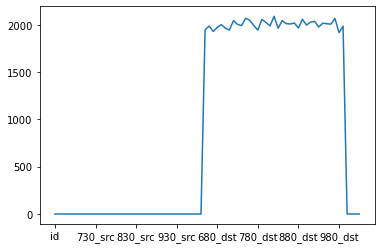

In [153]:
testing.isnull().sum().plot()b

In [ ]:
testing

In [150]:
testing.columns

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')